In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report
import sklearn

### Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
# get titanic data
df = acquire.get_titanic_data()


In [3]:
# view first few rows
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df1 = prepare.prep_titanic(df)

In [5]:
df1= df1.drop(columns = ['embarked', 'class',"passenger_id"])
df1

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,0,1
887,1,1,0,0,30.0000,1,0,0,1
888,0,3,1,2,23.4500,0,0,0,1
889,1,1,0,0,30.0000,1,1,0,0


In [6]:
titanic_train, titanic_validate, titanic_test = prepare.my_train_test_split(df1,"survived")
print(titanic_train.shape, titanic_validate.shape, titanic_test.shape)
print(titanic_train.describe().T)


(534, 9) (178, 9) (179, 9)
                         count       mean        std  min     25%   50%  \
survived                 534.0   0.383895   0.486789  0.0  0.0000   0.0   
pclass                   534.0   2.323970   0.822928  1.0  2.0000   3.0   
sibsp                    534.0   0.514981   1.143856  0.0  0.0000   0.0   
parch                    534.0   0.352060   0.759941  0.0  0.0000   0.0   
fare                     534.0  31.058106  46.866121  0.0  7.8958  13.5   
alone                    534.0   0.627341   0.483966  0.0  0.0000   1.0   
sex_male                 534.0   0.651685   0.476883  0.0  0.0000   1.0   
embark_town_Queenstown   534.0   0.086142   0.280837  0.0  0.0000   0.0   
embark_town_Southampton  534.0   0.713483   0.452558  0.0  0.0000   1.0   

                             75%       max  
survived                  1.0000    1.0000  
pclass                    3.0000    3.0000  
sibsp                     1.0000    8.0000  
parch                     0.0000    5.0000

In [7]:
titanic_train.describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.713483
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.452558
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [8]:
titanic_train.columns, titanic_validate.columns


(Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'),
 Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'))

In [9]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [10]:
# y_train data
y_titanic_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [11]:
# create a baseline model
titanic_baseline = (y_titanic_train == 0).mean()
print('The survival baseline is:', titanic_baseline)

The survival baseline is: 0.6161048689138576


In [12]:
# baseline model is the mode of target varible that did not survive.
# baseline accuracy is the survival baseline of 61.61% 

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [13]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=1)
# fit the thing
model1.fit(X_titanic_train, y_titanic_train)
# use the thing
print(f'training score: {model1.score(X_titanic_train, y_titanic_train):.2%}')
print(f'validate score: {model1.score(X_titanic_validate, y_titanic_validate):.2%}')

training score: 79.21%
validate score: 77.53%


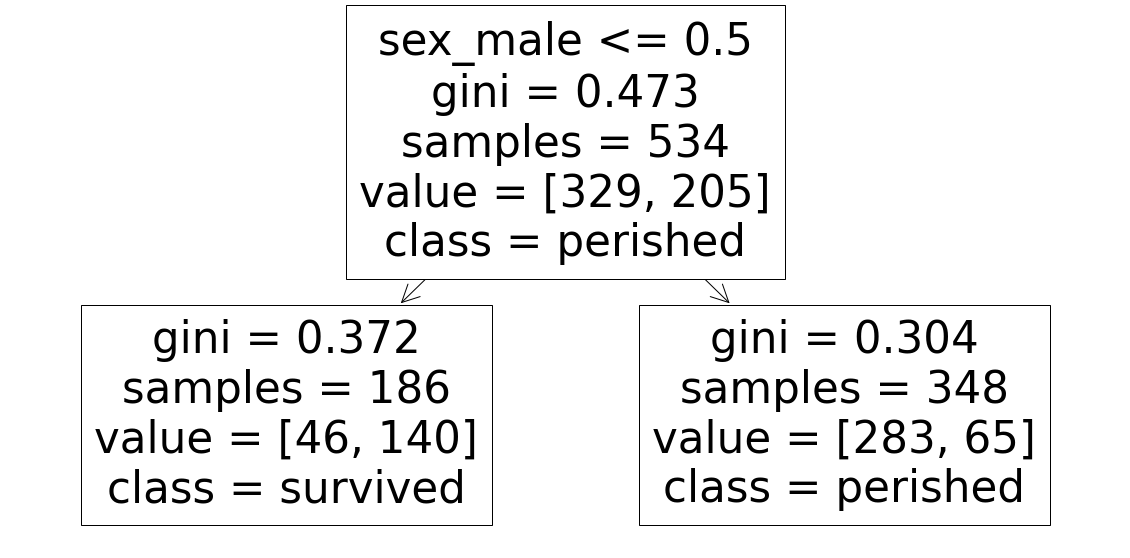

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model1, feature_names=X_titanic_train.columns.to_list(), class_names=['perished', 'survived']);

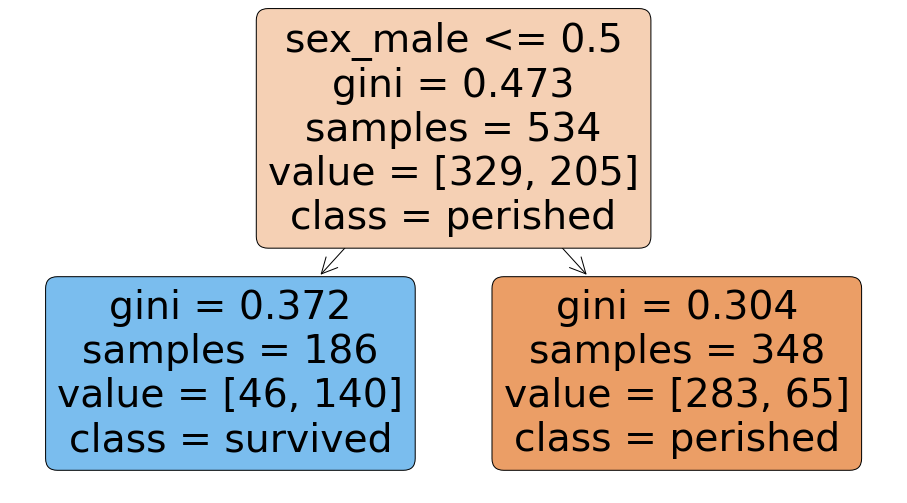

In [15]:
plt.figure(figsize=(16, 9))
plot_tree(
    # what thing:
          model1, 
    # what are the features called for the sake of the diagram?
          feature_names=X_titanic_train.columns.tolist(), 
    # what are the classes called for the sake of the diagram?
          class_names=['perished', 'survived'], 
    # fill the nodes with color!
          filled=True, 
    # round the corners
          rounded=True);
# note the opacity associates with the gini impurity!

In [16]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [17]:
# model1.fit(X, y)

clf = clf.fit(X_titanic_train, y_titanic_train)


In [18]:
# make prediction on train obeservations

y_titanic_pred = clf.predict(X_titanic_train)
y_titanic_pred[0:5]


array([0, 1, 0, 0, 0])

In [19]:
print(classification_report(y_titanic_train, y_titanic_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [20]:
#model1 score
model1.score(X_titanic_validate,y_titanic_validate)

0.7752808988764045

In [21]:
#classification report
print(classification_report(y_titanic_train, y_titanic_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [22]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred)


array([[283,  46],
       [ 65, 140]])

In [23]:
y_titanic_train.value_counts()


0    329
1    205
Name: survived, dtype: int64

In [24]:
import pandas as pd

labels = sorted(y_titanic_train.unique())

df1_confused = pd.DataFrame(sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred), index=labels, columns=labels)
df1_confused


,0,1
0,283,46
1,65,140


### 5.Run through steps 2-4 using a different max_depth value.



In [25]:
#model2
# make the thing
model2 = DecisionTreeClassifier(max_depth=3)
# fit the thing
model2.fit(X_titanic_train, y_titanic_train)
# use the thing
print(f'training score: {model2.score(X_titanic_train, y_titanic_train):.2%}')
print(f'validate score: {model2.score(X_titanic_validate, y_titanic_validate):.2%}')

training score: 81.84%
validate score: 79.21%


In [26]:
# model2.fit(X, y)

clf = clf.fit(X_titanic_train, y_titanic_train)


In [27]:
# make prediction on train obeservations

y_titanic_pred = clf.predict(X_titanic_train)
y_titanic_pred[0:5]


array([0, 1, 0, 0, 0])

In [28]:
print(classification_report(y_titanic_train, y_titanic_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



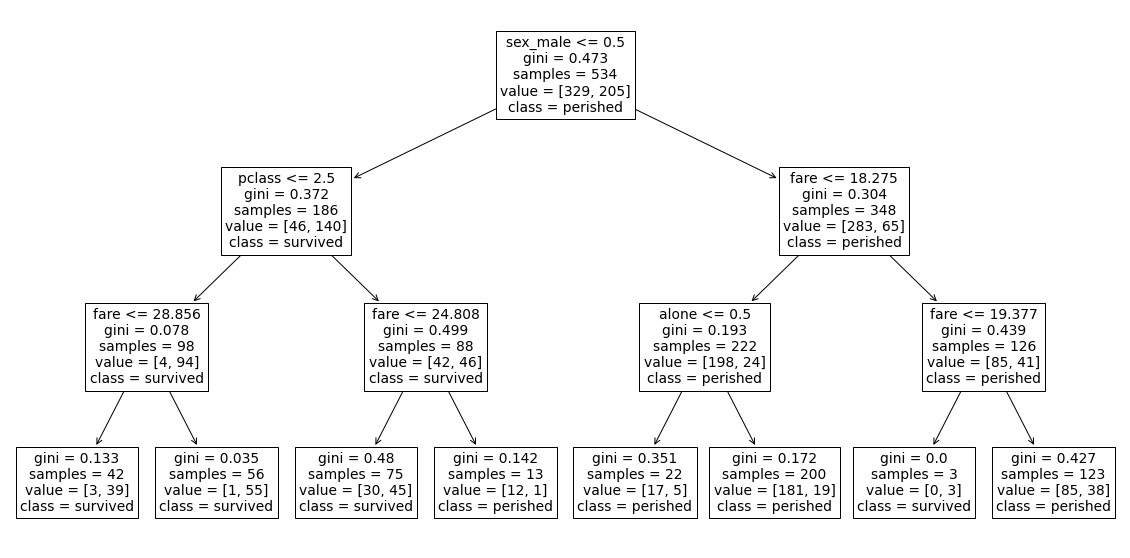

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model2, feature_names=X_titanic_train.columns.to_list(), class_names=['perished', 'survived']);

In [33]:
#model2 score
model2.score(X_titanic_validate,y_titanic_validate)

0.7921348314606742

In [34]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred)


array([[283,  46],
       [ 65, 140]])

In [35]:
y_titanic_train.value_counts()


0    329
1    205
Name: survived, dtype: int64

### 6. Which model performs better on your in-sample data?

In [36]:
# make a new column in y_preds
y_titanic_pred = clf.predict(X_titanic_train)
clf.score(X_titanic_train, y_titanic_train)

0.7921348314606742

In [37]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_titanic_train, y_titanic_train)
    models.append(model)
    model_scores.append(model.score(X_titanic_train, y_titanic_train))

In [38]:
len(models)

6

In [39]:
# depth 1 and depth 3 accuracy,  is the same at 79%


## TELCO DATASET 

### Exercise continuation

### 1. Work through these same exercises using the Telco dataset.
### 2. Experiment with this model on other datasets with a higher number of output classes.

In [171]:
# get telco data
df = acquire.get_telco_data()


In [172]:
# view first few rows
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [173]:
df1 = prepare.prep_telco(df)
df1= df1.drop(columns = ['customer_id', 
                         'gender', 
                         'partner', 
                         'dependents', 
                         'phone_service', 
                         'tech_support', 
                         'streaming_tv',
                         'multiple_lines',
                         'online_security',
                         'online_backup',
                         'device_protection',
                         'paperless_billing',
                         'churn',
                         'contract_type',
                         'internet_service_type',
                         'payment_type',
                         'streaming_movies'])

df1.total_charges.replace({"":0," ":0},inplace=True)
df1.total_charges = df1.total_charges.astype(float)

df1

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0,9,65.60,593.30,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0,9,59.90,542.40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0,4,73.90,280.85,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,2,1,1,13,98.00,1237.85,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,2,2,1,1,3,83.90,267.40,1,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,0,13,55.15,742.90,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,1,2,1,0,22,85.10,1873.70,0,1,0,...,0,0,1,0,0,1,0,0,1,0
7040,2,1,1,0,2,50.30,92.75,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,2,1,3,0,67,67.85,4627.65,0,1,1,...,0,0,1,0,1,0,0,0,0,1


In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        7043 non-null   int64  
 1   internet_service_type_id               7043 non-null   int64  
 2   contract_type_id                       7043 non-null   int64  
 3   senior_citizen                         7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   monthly_charges                        7043 non-null   float64
 6   total_charges                          7043 non-null   float64
 7   gender_encoded                         7043 non-null   int64  
 8   partner_encoded                        7043 non-null   int64  
 9   dependents_encoded                     7043 non-null   int64  
 10  phone_service_encoded                  7043 non-null   int64  
 11  pape

In [83]:
telco_train, telco_validate, telco_test = prepare.my_train_test_split(df1,"churn_encoded")
print(telco_train.shape, telco_validate.shape, telco_test.shape)
print(telco_train.describe().T)


(4225, 34) (1409, 34) (1409, 34)
                                        count         mean          std  \
payment_type_id                        4225.0     2.319053     1.151612   
internet_service_type_id               4225.0     1.875976     0.738711   
contract_type_id                       4225.0     1.687101     0.828349   
senior_citizen                         4225.0     0.161893     0.368397   
tenure                                 4225.0    32.500828    24.532563   
monthly_charges                        4225.0    65.056142    30.268493   
total_charges                          4225.0  2298.513598  2271.603284   
gender_encoded                         4225.0     0.491361     0.499985   
partner_encoded                        4225.0     0.488521     0.499927   
dependents_encoded                     4225.0     0.306272     0.460999   
phone_service_encoded                  4225.0     0.906982     0.290492   
paperless_billing_encoded              4225.0     0.593846     0.49

In [84]:
telco_train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,2.319053,1.875976,1.687101,0.161893,32.500828,65.056142,2298.513598,0.491361,0.488521,0.306272,...,0.392189,0.218462,0.395503,0.216095,0.235503,0.439053,0.218462,0.217515,0.336805,0.224852
std,1.151612,0.738711,0.828349,0.368397,24.532563,30.268493,2271.603284,0.499985,0.499927,0.460999,...,0.488296,0.413251,0.489016,0.411628,0.424363,0.496330,0.413251,0.412604,0.472673,0.417534
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.650000,411.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.400000,1401.150000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,90.150000,3865.450000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
telco_train.columns, telco_validate.columns


(Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
        'gender_encoded', 'partner_encoded', 'dependents_encoded',
        'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
        'multiple_lines_No phone service', 'multiple_lines_Yes',
        'online_security_No internet service', 'online_security_Yes',
        'online_backup_No internet service', 'online_backup_Yes',
        'device_protection_No internet service', 'device_protection_Yes',
        'tech_support_No internet service', 'tech_support_Yes',
        'streaming_tv_No internet service', 'streaming_tv_Yes',
        'streaming_movies_No internet service', 'streaming_movies_Yes',
        'contract_type_One year', 'contract_type_Two year',
        'internet_service_type_Fiber optic', 'internet_service_type_None',
        'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
        'payment

In [88]:
# X is indepedent variables
# y is target variable

# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [89]:
# y_train data
y_telco_train.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [90]:
# create a baseline model
telco_baseline = (y_telco_train == 0).mean()
print('The churn baseline is:', telco_baseline)

The churn baseline is: 0.7346745562130178


In [91]:
# baseline model is the mode of target varible that did not churn.
# baseline churn accuracy shows 0 as above 

In [92]:
X_telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        4225 non-null   int64  
 1   internet_service_type_id               4225 non-null   int64  
 2   contract_type_id                       4225 non-null   int64  
 3   senior_citizen                         4225 non-null   int64  
 4   tenure                                 4225 non-null   int64  
 5   monthly_charges                        4225 non-null   float64
 6   total_charges                          4225 non-null   float64
 7   gender_encoded                         4225 non-null   int64  
 8   partner_encoded                        4225 non-null   int64  
 9   dependents_encoded                     4225 non-null   int64  
 10  phone_service_encoded                  4225 non-null   int64  
 11  p

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [94]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=1)
# fit the thing
model1.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model1.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model1.score(X_telco_validate, y_telco_validate):.2%}')

training score: 73.47%
validate score: 73.46%


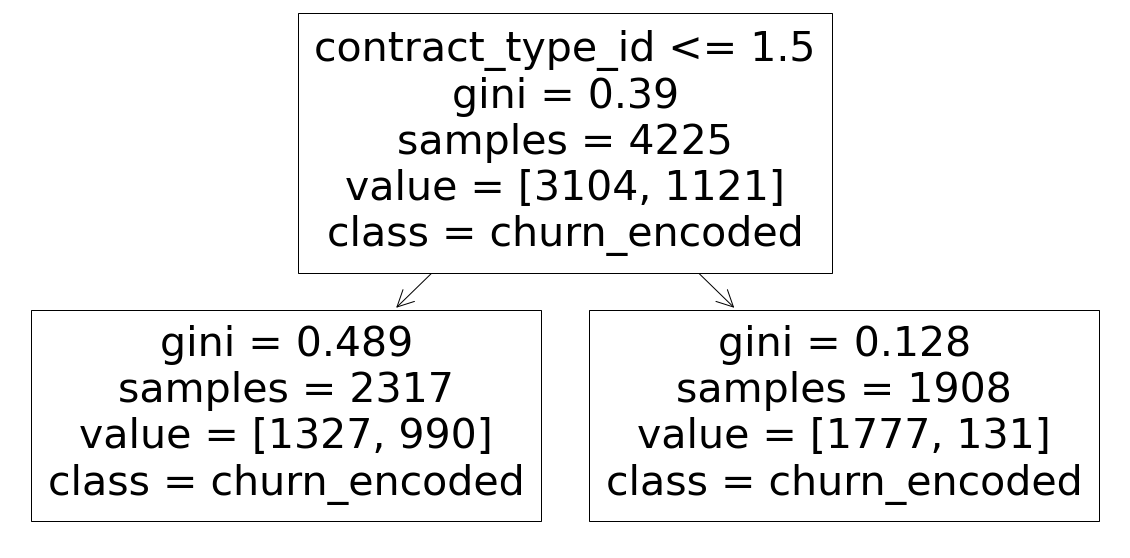

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model1, feature_names=X_telco_train.columns.to_list(), class_names=['churn_encoded']);

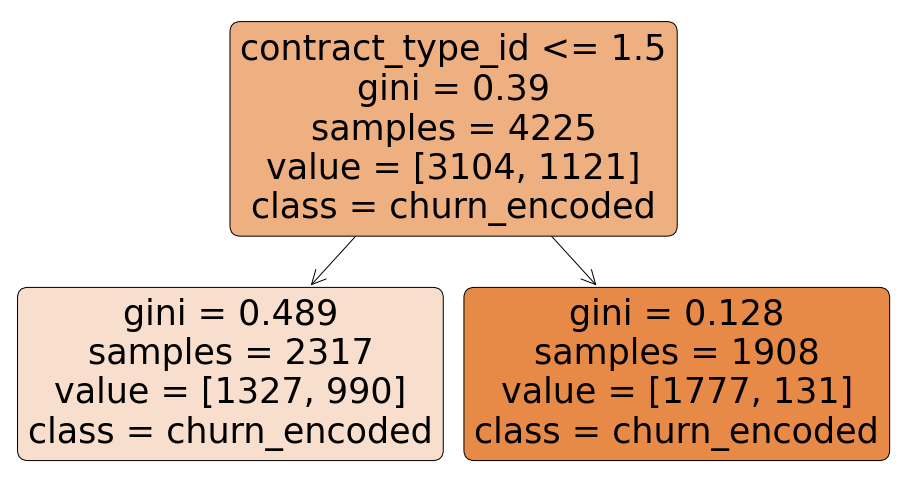

In [175]:
plt.figure(figsize=(16, 9))
plot_tree(
    # what thing:
          model1, 
    # what are the features called for the sake of the diagram?
          feature_names=X_telco_train.columns.tolist(), 
    # what are the classes called for the sake of the diagram?
          class_names=['churn_encoded'], 
    # fill the nodes with color!
          filled=True, 
    # round the corners
          rounded=True);
# note the opacity associates with the gini impurity!

In [176]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [177]:
# model1.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [178]:
# make prediction on train obeservations

y_telco_pred = clf.predict(X_telco_train)
y_telco_pred[0:5]


array([0, 0, 0, 0, 0])

In [179]:
print(classification_report(y_telco_train, y_telco_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [180]:
#model1 score
model1.score(X_telco_validate,y_telco_validate)

0.7345635202271115

In [181]:
#classification report
print(classification_report(y_telco_train, y_telco_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [182]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

In [183]:
y_telco_train.value_counts()


0    3104
1    1121
Name: churn_encoded, dtype: int64

In [184]:
import pandas as pd

labels = sorted(y_telco_train.unique())

df1_confused = pd.DataFrame(sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred), index=labels, columns=labels)
df1_confused


,0,1
0,3104,0
1,1121,0


### 5.Run through steps 2-4 using a different max_depth value.

In [185]:
#model2
# make the thing
model2 = DecisionTreeClassifier(max_depth=3)
# fit the thing
model2.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model2.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model2.score(X_telco_validate, y_telco_validate):.2%}')

training score: 78.79%
validate score: 79.28%


In [186]:
# model2.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [187]:
# make prediction on train obeservations

y_telco_pred = clf.predict(X_telco_train)
y_telco_pred[0:5]


array([0, 0, 0, 0, 0])

In [188]:
print(classification_report(y_telco_train, y_telco_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



In [ ]:
#####plot incomplete#############

In [269]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
#plot_tree(model2, feature_names=X_telco_train.columns.to_list(), class_names=['churn_encoded']);

In [193]:
#model2 score
model2.score(X_telco_validate,y_telco_validate)

0.7927608232789212

In [195]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

In [196]:
y_telco_train.value_counts()


0    3104
1    1121
Name: churn_encoded, dtype: int64

### 6. Which model performs better on your in-sample data?

In [197]:
# make a new column in y_preds
y_titanic_pred = clf.predict(X_telco_train)
clf.score(X_telco_train, y_telco_train)

0.7346745562130178

In [198]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_telco_train, y_telco_train)
    models.append(model)
    model_scores.append(model.score(X_telco_train, y_telco_train))

In [199]:
len(models)

6

In [ ]:
# depth 1 and depth 3 accuracy,  is the same at 73%


### RANDOM FOREST

### Exercises
### Continue working in your model file with titanic data to do the following:



### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [95]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [96]:
# get titanic data
df = acquire.get_titanic_data()
df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [97]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test


In [98]:
titanic_train.describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.713483
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.452558
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [99]:
titanic_train.columns, titanic_validate.columns


(Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'),
 Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'))

In [100]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [101]:
# y_train data
y_titanic_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [102]:
# Explore

In [103]:
#create an object
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
rf.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(max_depth=10)

In [104]:
#fit the model
rf.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(max_depth=10)

In [105]:
#predict
rf.predict(X_titanic_train)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [106]:
#evaluate
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_titanic_train, y_titanic_train)))

Accuracy of random forest classifier on training set: 0.94


In [107]:
#create a confusion matrix
cm = confusion_matrix(y_titanic_train, y_titanic_pred)
print(cm)

[[283  46]
 [ 65 140]]


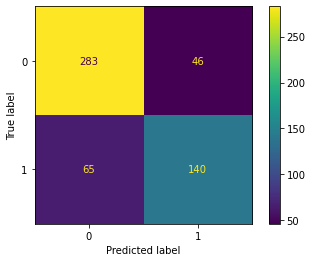

In [108]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [109]:
# create a classification report

In [110]:
rf.score(X_titanic_train, y_titanic_train)

0.9438202247191011

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [111]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_titanic_train,y_titanic_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(140, 283, 46, 65)

In [112]:
print(classification_report(y_titanic_train, rf.predict(X_titanic_train)))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



In [113]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7921348314606742
True Positive Rate: 0.6829268292682927
False Positive Rate: 0.1398176291793313
True Negative Rate: 0.8601823708206687
False Negative Rate: 0.3170731707317073
Precision: 0.7526881720430108
Recall: 0.6829268292682927
F1 Score: 0.7161125319693095
Support (0): 205
Support (1): 329


In [114]:
#Accuracy: 79%
#True Positive Rate: 68%
#False Positive Rate: 13% 
#True Negative Rate: 86% 
#False Negative Rate: 31% 
#Support: 534

### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [115]:
models = [rf]
start = 2
stop = 10

for i in range(start, stop):
    clf = RandomForestClassifier(min_samples_leaf = i, max_depth = stop - i)
    clf.fit(X_titanic_train, y_titanic_train)
    print(classification_report(y_titanic_train, clf.predict(X_titanic_train)))
    
    models.append(clf)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       329
           1       0.94      0.75      0.83       205

    accuracy                           0.89       534
   macro avg       0.90      0.86      0.87       534
weighted avg       0.89      0.89      0.88       534

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       329
           1       0.90      0.73      0.81       205

    accuracy                           0.87       534
   macro avg       0.88      0.84      0.85       534
weighted avg       0.87      0.87      0.86       534

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       329
           1       0.91      0.70      0.79       205

    accuracy                           0.86       534
   macro avg       0.87      0.83      0.84       534
weighted avg       0.86      0.86      0.85       534

              preci

In [116]:
models = [rf]
start = 2
stop = 10

for i in range(start, stop):
    clf = RandomForestClassifier(max_depth = i, random_state = 123)
    clf.fit(X_titanic_train, y_titanic_train)
    print(classification_report(y_titanic_train, clf.predict(X_titanic_train)))
    
    models.append(clf)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       329
           1       0.90      0.52      0.66       205

    accuracy                           0.79       534
   macro avg       0.83      0.74      0.76       534
weighted avg       0.82      0.79      0.78       534

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       329
           1       0.85      0.66      0.74       205

    accuracy                           0.82       534
   macro avg       0.83      0.79      0.80       534
weighted avg       0.83      0.82      0.82       534

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       329
           1       0.89      0.68      0.77       205

    accuracy                           0.85       534
   macro avg       0.86      0.82      0.83       534
weighted avg       0.85      0.85      0.84       534

              preci

In [117]:
# compare in-sample to out-of-sample
metrics = []

for i in range(2, 20):
    # Make the thing
    rf = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the thing
    rf = rf.fit(X_titanic_train, y_titanic_train)

    # Use the thing
    in_sample_accuracy = rf.score(X_titanic_train, y_titanic_train)
    
    out_of_sample_accuracy = rf.score(X_titanic_validate, y_titanic_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.794007,0.786517,0.007491
1,3,0.823970,0.803371,0.020599
2,4,0.846442,0.803371,0.043071
3,5,0.859551,0.797753,0.061798
4,6,0.880150,0.786517,0.093633
5,7,0.902622,0.792135,0.110487
6,8,0.932584,0.775281,0.157303
7,9,0.940075,0.775281,0.164794
8,10,0.943820,0.758427,0.185393
9,11,0.943820,0.764045,0.179775


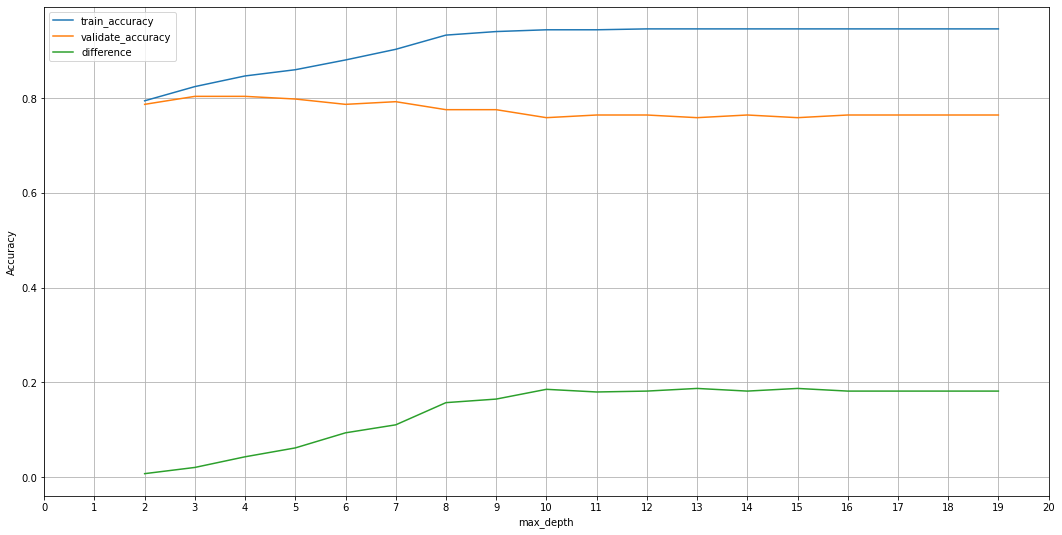

In [118]:
#plot different accuracies and differences
df.set_index('max_depth').plot(figsize = (18,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [119]:
# Increasing min_samples_per_leaf, decreasing max_depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the thing
    depth = max_depth - i
    n_samples = i
    rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the thing
    rf = rf.fit(X_titanic_train, y_titanic_train)

    # Use the thing
    in_sample_accuracy = rf.score(X_titanic_train, y_titanic_train)
    
    out_of_sample_accuracy = rf.score(X_titanic_validate, y_titanic_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.895131,0.786517,0.108614
1,3,17,0.880150,0.786517,0.093633
2,4,16,0.865169,0.803371,0.061798
3,5,15,0.846442,0.803371,0.043071
4,6,14,0.842697,0.808989,0.033708
5,7,13,0.840824,0.786517,0.054307
6,8,12,0.837079,0.792135,0.044944
7,9,11,0.833333,0.803371,0.029963
8,10,10,0.833333,0.808989,0.024345
9,11,9,0.823970,0.803371,0.020599


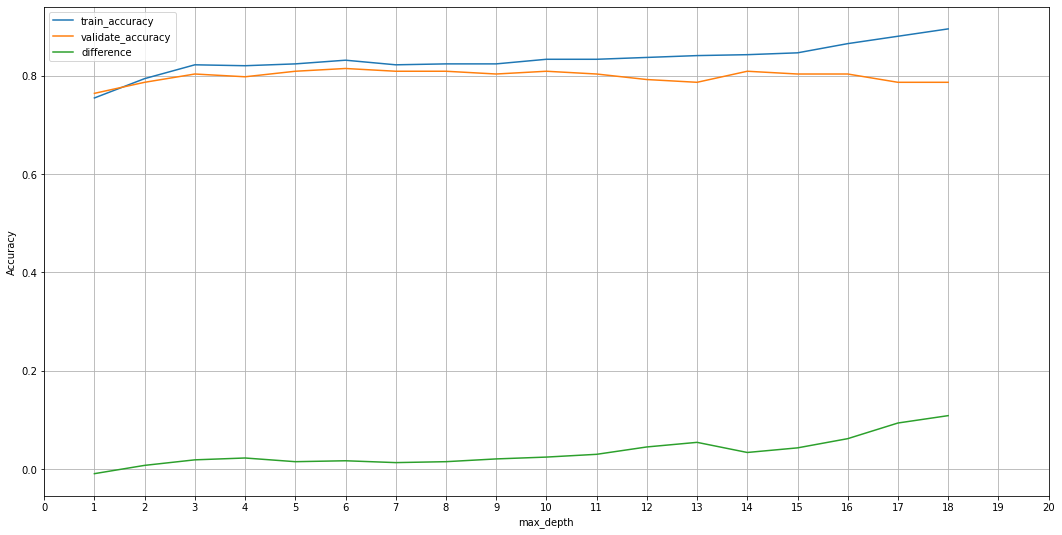

In [120]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (18,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [121]:
# there's differences in evaluation as seen above because we increased sample sizes and depth

## KNN EXERCISE

### Continue working in your model file with the titanic dataset.

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [122]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

In [123]:
# get titanic data
df = acquire.get_titanic_data()

In [124]:
# view first few rows
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [125]:
#Prepare

In [126]:
df1 = prepare.prep_titanic(df)

In [127]:
df1 = df.drop(columns = ['embarked', 'class','passenger_id', 'deck', 'embark_town'])
df1

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,1
888,0,3,female,NaN,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


In [128]:
#shape
titanic_train.shape, titanic_validate.shape, titanic_test.shape


((534, 9), (178, 9), (179, 9))

In [129]:
titanic_train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [130]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [131]:
X_titanic_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [132]:
X_titanic_validate.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [133]:
#Modeling

In [134]:
# make the thing (default value k5)
knn1 = KNeighborsClassifier()

In [135]:
# fit the thing
knn1.fit(X_titanic_train, y_titanic_train)

KNeighborsClassifier()

In [136]:
# use the thing
y_pred = knn1.predict(X_titanic_train)

In [137]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [138]:
#model evaluation

In [139]:
print(classification_report(y_titanic_train, knn1.predict(X_titanic_train)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [140]:
#create a confusion matrix
cm = confusion_matrix(y_titanic_train, y_pred)
cm

array([[280,  49],
       [ 50, 155]])

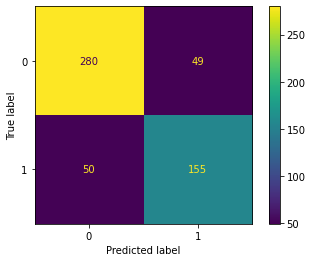

In [141]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)

disp.plot()
plt.show()

In [142]:
#classification report
pd.DataFrame(classification_report(y_titanic_train,y_pred,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.848485,0.759804,0.814607,0.804144,0.814441
recall,0.851064,0.756098,0.814607,0.803581,0.814607
f1-score,0.849772,0.757946,0.814607,0.803859,0.814521
support,329.000000,205.000000,0.814607,534.000000,534.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [143]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_titanic_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(155, 280, 49, 50)

In [144]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8146067415730337
True Positive Rate: 0.7560975609756098
False Positive Rate: 0.14893617021276595
True Negative Rate: 0.851063829787234
False Negative Rate: 0.24390243902439024
Precision: 0.7598039215686274
Recall: 0.7560975609756098
F1 Score: 0.7579462102689486
Support (0): 205
Support (1): 329


### 4. Run through steps 2-4 setting k to 10

In [145]:
# k = 10
# make the thing
knn2 = KNeighborsClassifier(n_neighbors = 10)

In [146]:
# fit the thing
knn2.fit(X_titanic_train, y_titanic_train)

KNeighborsClassifier(n_neighbors=10)

In [147]:
# use the thing
y_pred10 = knn2.predict(X_titanic_train)

In [148]:
y_pred10

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [149]:
print(classification_report(y_titanic_train, knn2.predict(X_titanic_train)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.75      0.64      0.69       205

    accuracy                           0.78       534
   macro avg       0.78      0.76      0.76       534
weighted avg       0.78      0.78      0.78       534



In [150]:
#create a confusion matrix
cm = confusion_matrix(y_titanic_train, y_pred10)
cm

array([[286,  43],
       [ 73, 132]])

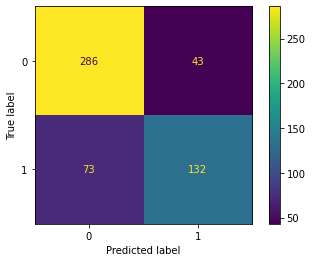

In [151]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn2.classes_)

disp.plot()
plt.show()

In [152]:
#classification report
pd.DataFrame(classification_report(y_titanic_train,y_pred10,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.796657,0.754286,0.782772,0.775472,0.780391
recall,0.869301,0.643902,0.782772,0.756602,0.782772
f1-score,0.831395,0.694737,0.782772,0.763066,0.778933
support,329.000000,205.000000,0.782772,534.000000,534.000000


In [153]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_titanic_train,y_pred10).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(132, 286, 43, 73)

In [154]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7827715355805244
True Positive Rate: 0.6439024390243903
False Positive Rate: 0.13069908814589665
True Negative Rate: 0.8693009118541033
False Negative Rate: 0.35609756097560974
Precision: 0.7542857142857143
Recall: 0.6439024390243903
F1 Score: 0.6947368421052631
Support (0): 205
Support (1): 329


### 5. Run through setps 2-4 setting k to 20

In [155]:
# k = 20
# make the thing
knn3 = KNeighborsClassifier(n_neighbors = 20)

In [156]:
# fit the thing
knn3.fit(X_titanic_train, y_titanic_train)

KNeighborsClassifier(n_neighbors=20)

In [157]:
# use the thing
y_pred20 = knn3.predict(X_titanic_train)

In [158]:
y_pred20

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [159]:
print(classification_report(y_titanic_train, knn3.predict(X_titanic_train)))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       329
           1       0.72      0.54      0.62       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



In [160]:
#create a confusion matrix
cm = confusion_matrix(y_titanic_train, y_pred20)
cm

array([[287,  42],
       [ 95, 110]])

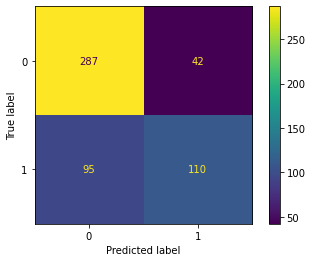

In [161]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn3.classes_)

disp.plot()
plt.show()

In [162]:
#classification report
pd.DataFrame(classification_report(y_titanic_train,y_pred20,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.751309,0.723684,0.743446,0.737497,0.740704
recall,0.872340,0.536585,0.743446,0.704463,0.743446
f1-score,0.807314,0.616246,0.743446,0.711780,0.733964
support,329.000000,205.000000,0.743446,534.000000,534.000000


In [163]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_titanic_train,y_pred20).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(110, 287, 42, 95)

In [164]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7434456928838952
True Positive Rate: 0.5365853658536586
False Positive Rate: 0.1276595744680851
True Negative Rate: 0.8723404255319149
False Negative Rate: 0.4634146341463415
Precision: 0.7236842105263158
Recall: 0.5365853658536586
F1 Score: 0.6162464985994398
Support (0): 205
Support (1): 329


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [165]:
#my model accuracy kept on reducing while increasing k from 5 to 10 and 20
#at K = 5 is better at an accuracy leval of 81%

### 7. Which model performs best on our out-of-sample data from validate?

In [166]:
knn = [knn1, knn2, knn3]

for index, model in enumerate(models):
    print(f'knn {index + 1}')
    print(classification_report(y_titanic_validate, model.predict(X_titanic_validate)))

knn 1
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.65      0.68        68

    accuracy                           0.76       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178

knn 2
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.86      0.53      0.65        68

    accuracy                           0.79       178
   macro avg       0.81      0.74      0.75       178
weighted avg       0.80      0.79      0.77       178

knn 3
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        68

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178

k

In [167]:
#model 1 performs best with the highest accuracy of 73%

## LOGISTIC REGRESSION 

## EXERCISES

### In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

### For all of the models you create, choose a threshold that optimizes for accuracy.

### Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.



### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?



In [168]:
import numpy as np
import pandas as pd
import math
# to get logistic regression, grab LogisticRegression from linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Slide Deck: https://www.canva.com/design/DAEfWtGKNgc/VqwX9iLNaf4TV7YJg6XflQ/view?utm_content=DAEfWtGKNgc&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

#### logistic regression in sklearn


In [224]:
# get titanic data
df = acquire.get_titanic_data()

In [237]:
df.head(10)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,NaN,Queenstown,1
6,6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,1
7,7,0,3,male,2.0,3,1,21.0750,S,Third,NaN,Southampton,0
8,8,1,3,female,27.0,0,2,11.1333,S,Third,NaN,Southampton,0
9,9,1,2,female,14.0,1,0,30.0708,C,Second,NaN,Cherbourg,0


In [247]:
df.shape[0]

891

In [253]:
def prep_titanic(df):
    #df=df.drop(columns = ["embarked","class"])
    df=df.drop(columns = ["deck"])
    df.embark_town = df.embark_town.fillna(value = "Southampton")
    dummy_df =pd.get_dummies(df[['sex','embark_town']], drop_first = True)
    df = pd.concat([df,dummy_df], axis = 1)
    df = df.drop(columns = ["sex","embark_town"])

    return df

In [230]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [231]:
titanic_train.survived.value_counts(normalize = True)


0    0.616105
1    0.383895
Name: survived, dtype: float64

In [232]:
# create a baseline model
titanic_baseline = (y_titanic_train == 0).mean()
print('The survived baseline is:', titanic_baseline)

The survived baseline is: 0.6161048689138576


In [256]:
titanic[titanic.age.isnull()]

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,class,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
5,5,0,3,NaN,0,0,8.4583,Q,Third,1,1,1,0
17,17,1,2,NaN,0,0,13.0000,S,Second,1,1,0,1
19,19,1,3,NaN,0,0,7.2250,C,Third,1,0,0,0
26,26,0,3,NaN,0,0,7.2250,C,Third,1,1,0,0
28,28,1,3,NaN,0,0,7.8792,Q,Third,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,859,0,3,NaN,0,0,7.2292,C,Third,1,1,0,0
863,863,0,3,NaN,8,2,69.5500,S,Third,0,0,0,1
868,868,0,3,NaN,0,0,9.5000,S,Third,1,1,0,1
878,878,0,3,NaN,0,0,7.8958,S,Third,1,1,0,1


In [258]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   age                      714 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embarked                 889 non-null    object 
 8   class                    891 non-null    object 
 9   alone                    891 non-null    int64  
 10  sex_male                 891 non-null    uint8  
 11  embark_town_Queenstown   891 non-null    uint8  
 12  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 111.5+ KB


In [270]:
titanic.isna().sum()

passenger_id                 0
survived                     0
pclass                       0
age                        177
sibsp                        0
parch                        0
fare                         0
embarked                     2
class                        0
alone                        0
sex_male                     0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [272]:
avg_age=titanic.age.mean()

In [273]:
titanic["age"]=titanic.age.fillna(avg_age)

In [274]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   age                      891 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embarked                 889 non-null    object 
 8   class                    891 non-null    object 
 9   alone                    891 non-null    int64  
 10  sex_male                 891 non-null    uint8  
 11  embark_town_Queenstown   891 non-null    uint8  
 12  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 111.5+ KB


In [260]:
#additions
features_model_1 = ['age', 'fare', 'pclass']

### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

